In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from pandas import Series,DataFrame
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn import preprocessing
#import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1=pd.read_csv('promotions.csv')

In [7]:
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [7]:
def cat_encode(data_df, method, col, prefix):
    if (method == 1):   #label (simple) encoding
        le = LabelEncoder()
        data_df[col]= le.fit_transform(data_df[col].astype(str))
    elif (method == 2): #one-hot encoding
        dummies_df  = pd.get_dummies(data_df[col].astype(str), prefix=prefix)        
        data_df = data_df.join(dummies_df)
    
    return data_df

In [82]:
df1=cat_encode(df1,2,'gender','gen')
df1=cat_encode(df1,2,'department','dep')
df1=cat_encode(df1,1,'region',1)
df1=cat_encode(df1,2,'education','edu')
df1=cat_encode(df1,1,'recruitment_channel',1)
df1=df1.drop(columns=['gender','department','education'])


<AxesSubplot:>

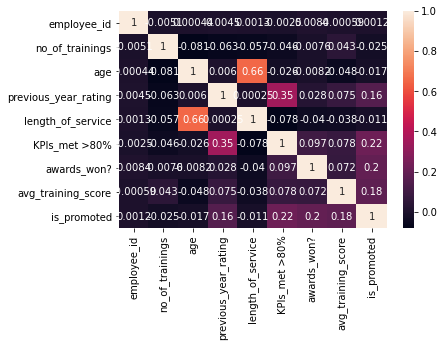

In [4]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [84]:
df1.describe(include=['O'])

ValueError: No objects to concatenate

In [85]:
df=df1.dropna()

In [ ]:
def update_fare(data_df):
    
    data_df.loc[ data_df['Fare'] <= 7.91, 'Fare'] = 0
    data_df.loc[(data_df['Fare'] > 7.91) & (data_df['Fare'] <= 14.454), 'Fare'] = 1
    data_df.loc[(data_df['Fare'] > 14.454) & (data_df['Fare'] <= 31), 'Fare']   = 2
    data_df.loc[ data_df['Fare'] > 31, 'Fare'] = 3
    data_df['Fare'] = data_df['Fare'].astype(int)
    
    return data_df

train_df = update_fare(train_df)
test_df = update_fare(test_df)

In [14]:
y=df1[['is_promoted']].dropna()
x=df.drop(columns=['is_promoted']).dropna()

NameError: name 'df' is not defined

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

NameError: name 'x' is not defined

In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            48660 non-null  int64  
 1   gender                 48660 non-null  int64  
 2   no_of_trainings        48660 non-null  int64  
 3   age                    48660 non-null  int64  
 4   previous_year_rating   48660 non-null  float64
 5   length_of_service      48660 non-null  int64  
 6   KPIs_met >80%          48660 non-null  int64  
 7   awards_won?            48660 non-null  int64  
 8   avg_training_score     48660 non-null  int64  
 9   dep_Analytics          48660 non-null  uint8  
 10  dep_Finance            48660 non-null  uint8  
 11  dep_HR                 48660 non-null  uint8  
 12  dep_Legal              48660 non-null  uint8  
 13  dep_Operations         48660 non-null  uint8  
 14  dep_Procurement        48660 non-null  uint8  
 15  de

In [55]:
y.shape

(50684, 1)

In [89]:
knn=range(1,10,2)
scor_knn={}


for i in knn:
    #set knn in cf_scor
    cf_for=KNeighborsClassifier(n_neighbors = i)# ,metric= 'minkowski',p =2)
    cf_for.fit(x_train, y_train)
    #get scor in list
    scor_knn[i]=cf_for.score(x_test,y_test)*100
    
    
max_knn=0
max_scor=0
for knn,scr in scor_knn.items():
    #print(knn,scr)
    if scr>max_scor :
        max_knn=knn
        max_scor=scr
    else:
        pass

print('max knn is:',max_knn)    
print("in score fo %.2f"%(scor_knn[max_knn]),'%')       
print(scor_knn)

max knn is: 9
in score fo 91.30 %
{1: 84.6897504192562, 3: 89.79974351386012, 5: 90.83555292492848, 7: 91.18082272861794, 9: 91.29920094702575}


In [90]:
score_tree={}
for i in range(1,51,10):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train, y_train)
    score_tree[i]=tree.score(x_test, y_test)
    print(score_tree[i],i)
max_tree=0
max_scor=0
for d,scr in score_tree.items():
    #print(knn,scr)
    if scr>max_scor :
        max_tree=d
        max_scor=scr
    else:
        pass
print('max depth is:',max_knn)    
print("in score fo %.2f"%(max_scor),'%')       
print(score_tree)



0.9221663213968629 1
0.9376541383052185 11
0.9114136332248199 21
0.8984906777153003 31
0.8990825688073395 41
max depth is: 9
in score fo 0.94 %
{1: 0.9221663213968629, 11: 0.9376541383052185, 21: 0.9114136332248199, 31: 0.8984906777153003, 41: 0.8990825688073395}


In [71]:
def prepare_sets(train_df, test_df):
    # define training and testing sets
    X_train = train_df.drop("Survived", axis=1)
    Y_train = train_df["Survived"]
    X_test  = test_df.drop("PassengerId", axis=1).copy()
    return X_train, Y_train, X_test

def data_split(X_train, Y_train, train_size=0.8):
    X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, Y_train, train_size=train_size, random_state = 2020)
    split_index = [-1 if x in X_train_train.index else 0 for x in X_train.index]
    return X_train_train, X_train_val, y_train_train, y_train_val
    

def normalize(X_train, X_val, X_test):
    sc = StandardScaler()
    X_train_ = sc.fit_transform(X_train)
    X_train.loc[:,:] = X_train_
    if len(X_val) > 0:
        X_val_ = sc.transform(X_val)
        X_val.loc[:,:] = X_val_
    X_test_ = sc.transform(X_test)
    X_test.loc[:,:] = X_test_
    
    return X_train, X_val, X_test

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

def run_classificationKFold(classifier, X_train, Y_train, X_test, n_estimators=100):
    classifiers = ['LogisticRegression','RandomForest','SVC','XGBClassifier','KNeighbors','GaussianNB','DecisionTree']
    if (classifier == 1):
       # Logistic Regression
        clf = LogisticRegression()
    elif (classifier == 2):
        # Random Forest
        clf = RandomForestClassifier(n_estimators=n_estimators)
    elif (classifier == 3):
        # SVC
        clf = SVC(kernel = 'rbf', random_state = 0)
    elif (classifier == 4):
        clf = XGBClassifier()
    elif (classifier == 5):
        clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    elif (classifier == 6):
        clf = GaussianNB()
    elif (classifier == 7):
        clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

    kf = KFold(n_splits=10)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cv_score = cross_val_score(clf, X_train, Y_train, cv=kf).mean()
    score = clf.score(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
        
    return clf,score, cv_score, Y_pred, Y_train_pred, classifiers

def run_classification(classifier, X_train, Y_train, X_test, Y_test, n_estimators=100):
    classifiers = ['LogisticRegression','RandomForest','SVC','XGBClassifier','KNeighbors','GaussianNB','DecisionTree']
    if (classifier == 1):
       # Logistic Regression
        clf = LogisticRegression()
    elif (classifier == 2):
        # Random Forest
        clf = RandomForestClassifier(n_estimators=n_estimators)
    elif (classifier == 3):
        # SVC
        clf = SVC(kernel = 'rbf', random_state = 0)
    elif (classifier == 4):
        clf = XGBClassifier()
    elif (classifier == 5):
        clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    elif (classifier == 6):
        clf = GaussianNB()
    elif (classifier == 7):
        clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
        
    return clf, train_score, test_score, Y_train_pred, Y_test_pred, classifiers
        